### Imports

In [85]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Constants

In [111]:
Test_Path = "data/train/daisy/15207766_fc2f1d692c_n.jpg"

trainPath = "data/train"
validationPath = "data/validation"
classMode = 'binary'
batchSize = 5000
targetSize = (200, 200)

nr_epochs = 1

testPath = "data/test"

<center><i><h4>Testing if the images are being read

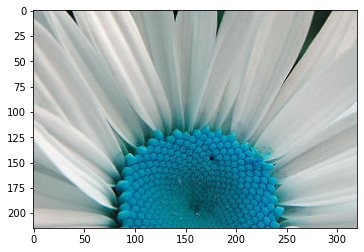

In [5]:
img = cv2.imread(Test_Path)
plt.imshow(img)
plt.show()

In [6]:
cv2.imread(Test_Path).shape

(215, 320, 3)

<center><h3> Checking for max and min values of color in an image 

In [7]:
print("Max value in the above img ",cv2.imread(Test_Path).max())
print("Min value in the above img ",cv2.imread(Test_Path).min())

Max value in the above img  255
Min value in the above img  0


In [8]:
#image color ranges from 0-255
#by dividing it by 255 we get values from 0-1
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

## <center>  Preparation of data

In [9]:
train_dataset = train.flow_from_directory(trainPath, target_size=targetSize,
                                          batch_size=batchSize, class_mode=classMode)
validation_dataset = train.flow_from_directory(validationPath, target_size=targetSize,
                                               batch_size=batchSize, class_mode=classMode)

Found 3858 images belonging to 5 classes.
Found 433 images belonging to 5 classes.


In [10]:
train_dataset.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [11]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4])

##  <center> Convolutional Neural Netowrk

In [26]:
model_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),input_shape=(200,200,3,),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.5),
                                    
                                    
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.4),
                                    
                                    
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.4),
                                    
                                    
                                   
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(256,activation='relu'),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(5,activation='softmax')])

In [27]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               37748992  
_________________________________________________________________
dense_4 (Dense)              (None, 5)                

In [28]:
#compilting our model
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [50]:
%%time

hist = model_1.fit(train_dataset, batch_size=batchSize, epochs=nr_epochs, validation_data=validation_dataset, verbose=1)

155/155 [==============================] - 398s 3s/step - loss: 1.1407 - accuracy: 0.5285 - val_loss: 1.4219 - val_accuracy: 0.3995
Wall time: 6min 40s


In [115]:
def flowerName(img):
    img = cv2.resize(img, (200, 200))
    img = np.expand_dims(img, axis=0)
    x = np.vstack([img])
    value = model_1.predict(x)
    if(value[0][0] == 1):
        print('daisy')
    if(value[0][1] == 1.0):
        print('dandelion')
    if(value[0][2] == 1.0):
        print('rose') 
    if(value[0][3] == 1.0):
        print('sunflower') 
    if(value[0][4] == 1.0):
        print('tulip')    

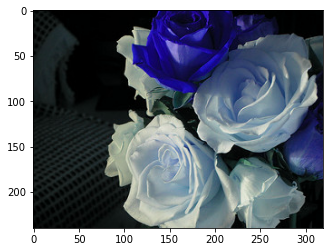

daisy


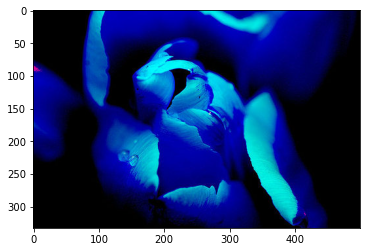

daisy


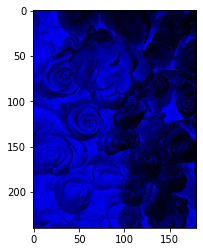

tulip


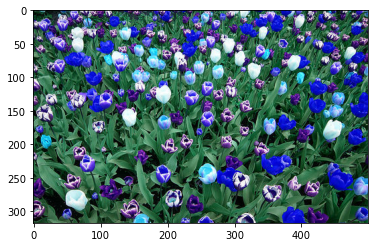

tulip


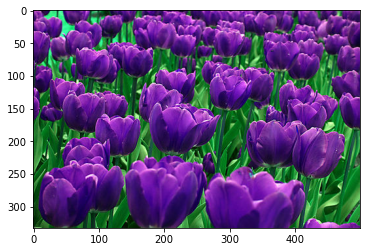

tulip


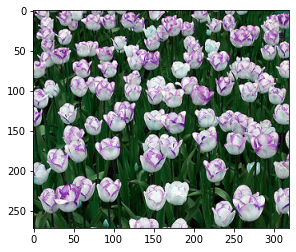

tulip


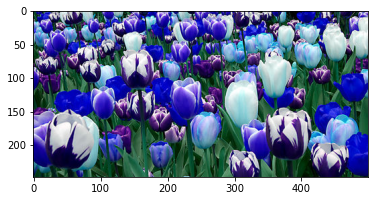

tulip


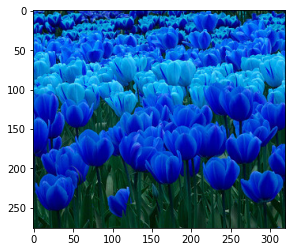

daisy


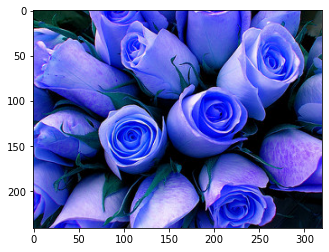

tulip


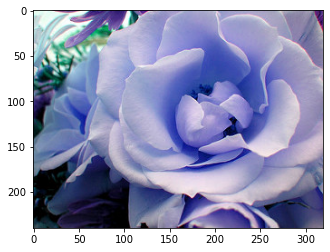

daisy


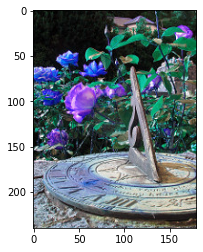

tulip


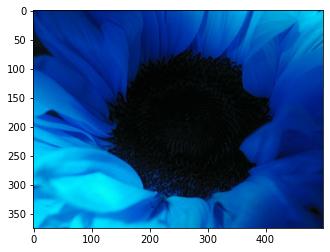

tulip


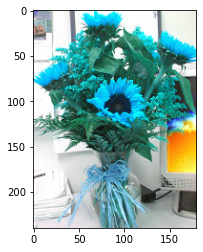

sunflower


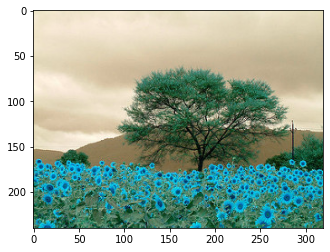

tulip


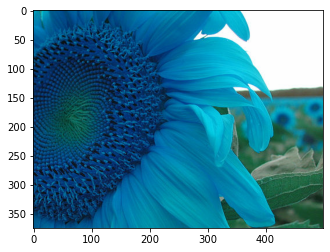

daisy


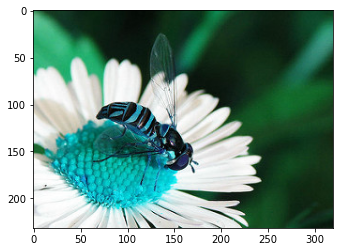

dandelion


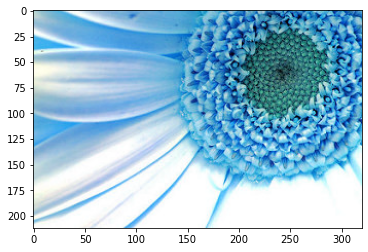

dandelion


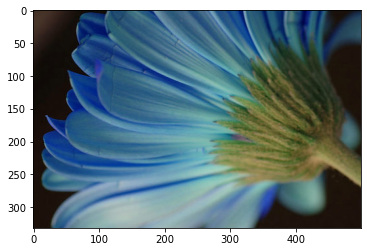

daisy


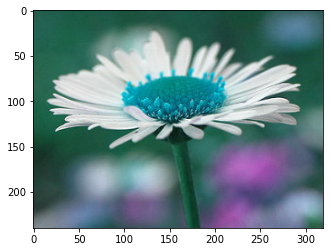

daisy


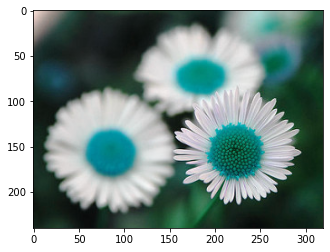

daisy


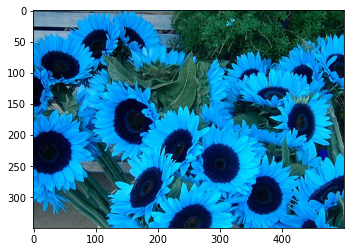

daisy


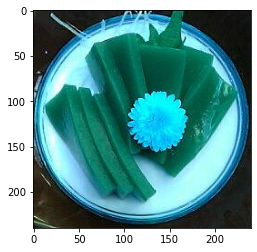

daisy


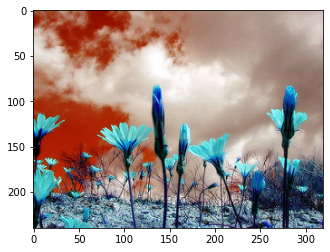

tulip


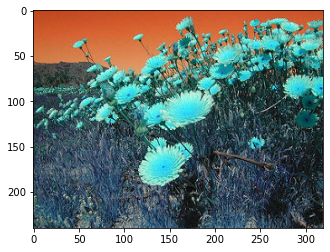

daisy


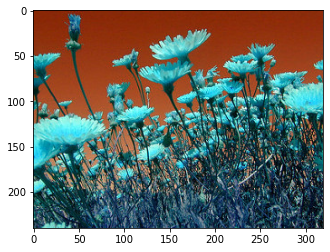

tulip


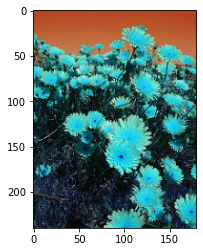

daisy


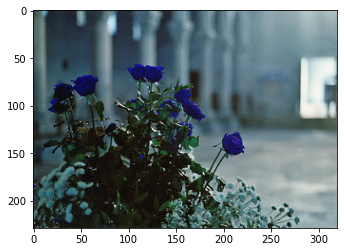

tulip


In [116]:
for i in (os.listdir(testPath)):
    finalPath = testPath+'/'+i
    img = cv2.imread(finalPath)
    plt.imshow(img)
    plt.show()
    flowerName(img)
